# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
#filename = './results/GoCFanIn/EA_individuals_mfgoc_fanin_2000_multi4.csv'
filename = './results/GoCFanIn/EA_individuals_mfgoc_fanin_2000_AT_multi4.csv'
number_of_parameters = 2
number_of_features = 2
parameters_to_plot_2D = [0,1]
selected_individuals = 10
min_parameter_values = numpy.array([-1.4e-8,0.0])
max_parameter_values = numpy.array([-0.0e-9,2.0])
labels = ['GoC-GoC Max Weight (nS)', 'GoC-GoC LTD/LTP ratio']

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]
hall_of_fame = numpy.argsort(output[:,0])[-selected_individuals:][::-1]
print 'Hall of fame:'
for pos, best_id in enumerate(hall_of_fame):
    print pos+1,". Parameters:",parameters[best_id,:],"Features:",output[best_id,:]

Loaded 4 columns and 1313 rows
Hall of fame:
1 . Parameters: [-1.34396900e-10  3.29913695e-01] Features: [0.70442012 0.05173155]
2 . Parameters: [-1.19391084e-10  1.76973146e-02] Features: [0.69811524 0.06157279]
3 . Parameters: [-1.71153208e-10  4.30194168e-01] Features: [0.69657068 0.03739247]
4 . Parameters: [-7.01087921e-11  5.33386890e-01] Features: [0.69076207 0.08353992]
5 . Parameters: [-1.71153208e-10  2.64473125e-01] Features: [0.66405344 0.03727136]
6 . Parameters: [-2.82727398e-10  5.41420348e-01] Features: [0.65280616 0.05124153]
7 . Parameters: [-8.69495970e-09  7.30317871e-01] Features: [0.60443542 0.05723821]
8 . Parameters: [-8.69495970e-09  7.30317871e-01] Features: [0.60443542 0.05723821]
9 . Parameters: [-7.58368874e-09  7.30317871e-01] Features: [0.60430865 0.05466586]
10 . Parameters: [-8.51022793e-09  7.09628241e-01] Features: [0.60363052 0.05978367]


Plot the parameter and output distribution

<IPython.core.display.Javascript object>


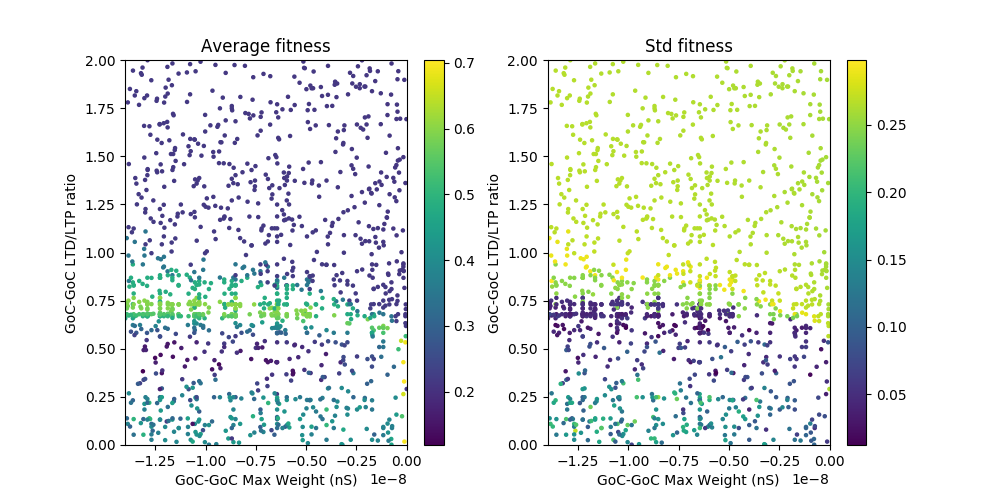

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()

Plot multiscale scaling of the parameters

<IPython.core.display.Javascript object>


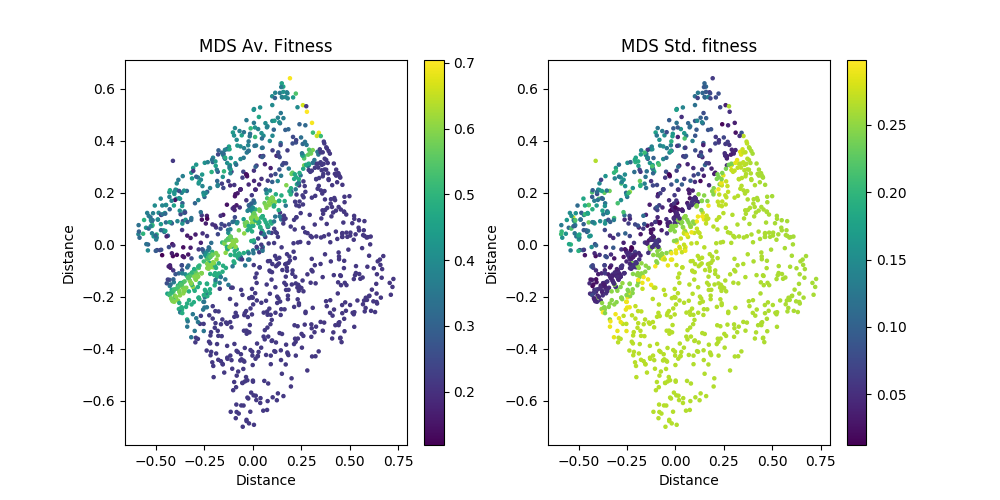

In [5]:
import sklearn.manifold
# Scale the parameters according to the search boundaries
scaled_parameters = (parameters-min_parameter_values)/(max_parameter_values-min_parameter_values)
mds = sklearn.manifold.MDS(number_of_parameters, max_iter=10000, n_init=1)
Y = mds.fit_transform(scaled_parameters)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,0])
plt.title('MDS Av. Fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,1])
plt.title('MDS Std. fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.show()